In [4]:
import pandas as pd
from datetime import datetime, timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from helpers_coint import *

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import os
folder = 'UK_Stocks/'
path = '../../redemption_trader/processed_data/'+folder
data_csv = os.listdir(path)

print(data_csv)

['RIO.L_clean.csv', 'JAM.L_clean.csv', 'BVIC.L_clean.csv', 'TRIG.L_clean.csv', 'NG.L_clean.csv', 'WOSG.L_clean.csv', 'FEML.L_clean.csv', 'INDV.L_clean.csv', 'HIK.L_clean.csv', 'WKP.L_clean.csv', 'INPP.L_clean.csv', 'LWDB.L_clean.csv', 'RSW.L_clean.csv', 'HSBA.L_clean.csv', 'SYNC.L_clean.csv', 'HSL.L_clean.csv', 'HVPE.L_clean.csv', 'QQ.L_clean.csv', 'SHEL.L_clean.csv', 'KGF.L_clean.csv', 'BREE.L_clean.csv', 'PPH.L_clean.csv', 'JII.L_clean.csv', 'LAND.L_clean.csv', 'SCT.L_clean.csv', 'KNOS.L_clean.csv', 'BDEV.L_clean.csv', 'WTAN.L_clean.csv', 'SMWH.L_clean.csv', 'TRY.L_clean.csv', '3IN.L_clean.csv', 'CCL.L_clean.csv', 'HRI.L_clean.csv', 'ICP.L_clean.csv', 'JEDT.L_clean.csv', 'HBR.L_clean.csv', 'RAT.L_clean.csv', 'BA.L_clean.csv', 'MOON.L_clean.csv', 'BARC.L_clean.csv', 'LSEG.L_clean.csv', 'INVP.L_clean.csv', 'CGT.L_clean.csv', 'PCT.L_clean.csv', 'PRTC.L_clean.csv', 'SNR.L_clean.csv', 'III.L_clean.csv', 'SEQI.L_clean.csv', 'UKW.L_clean.csv', 'DGN.L_clean.csv', 'TIFS.L_clean.csv', 'STJ.L_c

In [ ]:

p_crit  = 0.025
daily_data_f = False
output_folder = './UK_results/'
output_file_name = 'UK_coint_results_Feb_6'

output_file_name = output_folder+output_file_name

In [ ]:
score_mat, p_mat, pairs = find_coint_pairs(path,data_csv,pval_crit=p_crit,formation_period_days=500,adj4day=daily_data_f)

pval =  0.0056799049387928485 ( GNS.L_clean.csv / INF.L_clean.csv )
--------------------------------------------------
pval =  0.018553192859555465 ( HAS.L_clean.csv / FSFL.L_clean.csv )
--------------------------------------------------
pval =  0.02096308355615691 ( RCP.L_clean.csv / ADM.L_clean.csv )
--------------------------------------------------
pval =  0.007463384292813242 ( RCP.L_clean.csv / MGAM.L_clean.csv )
--------------------------------------------------
pval =  0.01670037348180908 ( RCP.L_clean.csv / FUTR.L_clean.csv )
--------------------------------------------------
pval =  0.019477991904096728 ( RCP.L_clean.csv / INF.L_clean.csv )
--------------------------------------------------
pval =  0.01260695364174351 ( RCP.L_clean.csv / FSFL.L_clean.csv )
--------------------------------------------------
pval =  0.00947192362369564 ( BLND.L_clean.csv / IGG.L_clean.csv )
--------------------------------------------------
pval =  0.011032230526881574 ( DNLM.L_clean.csv / SGRO

<Axes: >

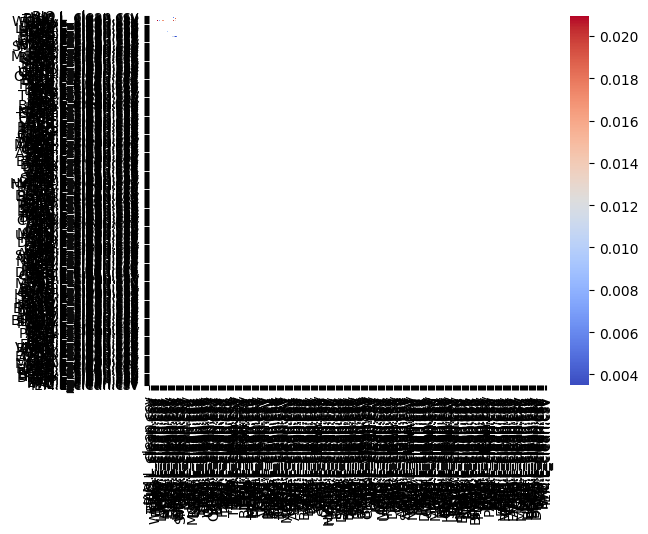

In [ ]:
import seaborn as sns
mask = (p_mat == 0) | (p_mat>=p_crit)
sns.heatmap(p_mat, xticklabels=data_csv,yticklabels=data_csv,cmap='coolwarm',mask = mask)

In [ ]:
pairs

[('GNS.L_clean.csv', 'INF.L_clean.csv'),
 ('HAS.L_clean.csv', 'FSFL.L_clean.csv'),
 ('RCP.L_clean.csv', 'ADM.L_clean.csv'),
 ('RCP.L_clean.csv', 'MGAM.L_clean.csv'),
 ('RCP.L_clean.csv', 'FUTR.L_clean.csv'),
 ('RCP.L_clean.csv', 'INF.L_clean.csv'),
 ('RCP.L_clean.csv', 'FSFL.L_clean.csv'),
 ('BLND.L_clean.csv', 'IGG.L_clean.csv'),
 ('DNLM.L_clean.csv', 'SGRO.L_clean.csv'),
 ('DNLM.L_clean.csv', 'INF.L_clean.csv'),
 ('DNLM.L_clean.csv', 'AML.L_clean.csv'),
 ('DNLM.L_clean.csv', 'FSFL.L_clean.csv'),
 ('DNLM.L_clean.csv', 'GAW.L_clean.csv')]

In [ ]:
pair_beta = get_hedge_ratio(path,pairs)
stds, means = get_std_n_ma(path,pairs, pair_beta)


In [ ]:
import csv
with open(output_file_name+"_beta.csv",mode = 'w', newline = '') as f:
    wr = csv.writer(f)
    wr.writerow(['Pair', 'Beta'])
    for k,v in pair_beta.items():
        wr.writerow([k,v])

with open(output_file_name+"_stds.csv",mode = 'w', newline = '') as f:
    wr = csv.writer(f)
    wr.writerow(['Pair', 'std'])
    for k,v in stds.items():
        wr.writerow([k,v])

with open(output_file_name+"_means.csv",mode = 'w', newline = '') as f:
    wr = csv.writer(f)
    wr.writerow(['Pair', 'mean'])
    for k,v in means.items():
        wr.writerow([k,v])

        

beta:  -0.3939246624524749
mean:  656.7642018733094
('DNLM.L_clean.csv', 'AML.L_clean.csv')


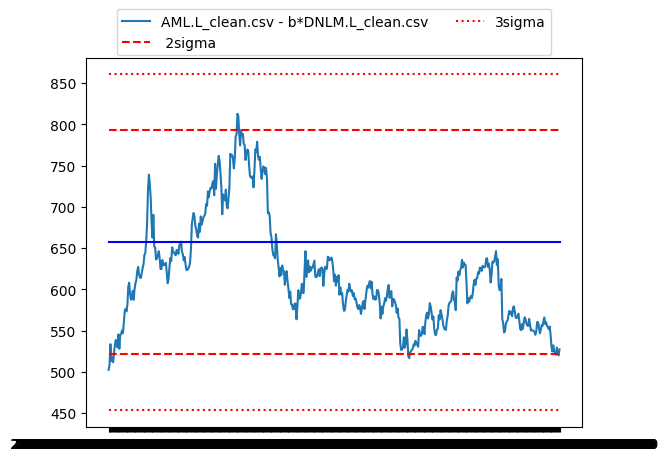

In [ ]:
i = 10
print('beta: ', pair_beta[pairs[i]])
print('mean: ', means[pairs[i]])

plot_pair(path,pairs[i],pair_beta[pairs[i]],means[pairs[i]], stds[pairs[i]])